# Objetivo

Analisar a correlação do valor dos elencos dos times da Premier League com a posição final dos times no campeonato desde a temporada 2008/09 até a temporada 2022/23. Ter uma noção de quanto um time deve gastar para atingir seus objetivos. Seja ele fugir do rebaixamento, conquistar uma vaga em competição europeia ou ser campeão.

# Preparando ambiente

Conjunto de importações para configurar um ambiente completo para manipulação e análise de dados (pandas e numpy), visualização de dados e geração de gráficos (matplotlib e seaborn), e desenvolvimento e avaliação de modelos de aprendizado de máquina (scikit-learn).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Usaremos uma base de dado que vai da temporada de 2009 até a de 2023 da Premier League. Nela contém a liga que foi disputada (EPL), a temporada correspondente (Season), o time analisado (Team), o número de jogadores no elenco (Squad), a média de idade dos jogadores (Average Age), os jogadores não formados na equipe (Non-Homegrown), a soma dos valores estimados dos jogadores do time (Squad Value), a média de valor dos jogadores do time (Avg Player Value) ambos segundo o Transfermarket, o saldo de gols (GD), os pontos conquistados no campeonato (Points) e a posição que o time terminou (Position).

In [2]:
#carregar base de dados
data = pd.read_csv("/content/PositionsvsValue.csv")
data.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2009,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2009,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2009,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2009,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2009,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8


In [3]:
data.describe()

,Season,Squad,Average Age,Non-Homegrown,Squad Value,GD,Points,Position
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2016.000000,33.560000,25.178667,21.333333,292.619833,0.000000,52.346667,10.500000
std,4.327713,6.606959,1.293259,5.521823,238.695767,27.405295,17.582481,5.775916
min,2009.000000,21.000000,21.300000,8.000000,22.500000,-61.000000,16.000000,1.000000
25%,2012.000000,28.000000,24.175000,18.000000,115.212500,-20.000000,40.000000,5.750000
50%,2016.000000,34.000000,25.300000,21.000000,205.465000,-7.000000,47.000000,10.500000
75%,2020.000000,38.000000,25.900000,24.250000,404.937500,18.250000,64.250000,15.250000
max,2023.000000,54.000000,28.300000,41.000000,1150.000000,79.000000,100.000000,20.000000


# Separando o joio do trigo

Da base de dados carregada, extraímos 300 linhas de informação. A seguir, vamos criar uma matriz de gráficos utilizando os dados que julgamos mais importantes para a nossa análise.

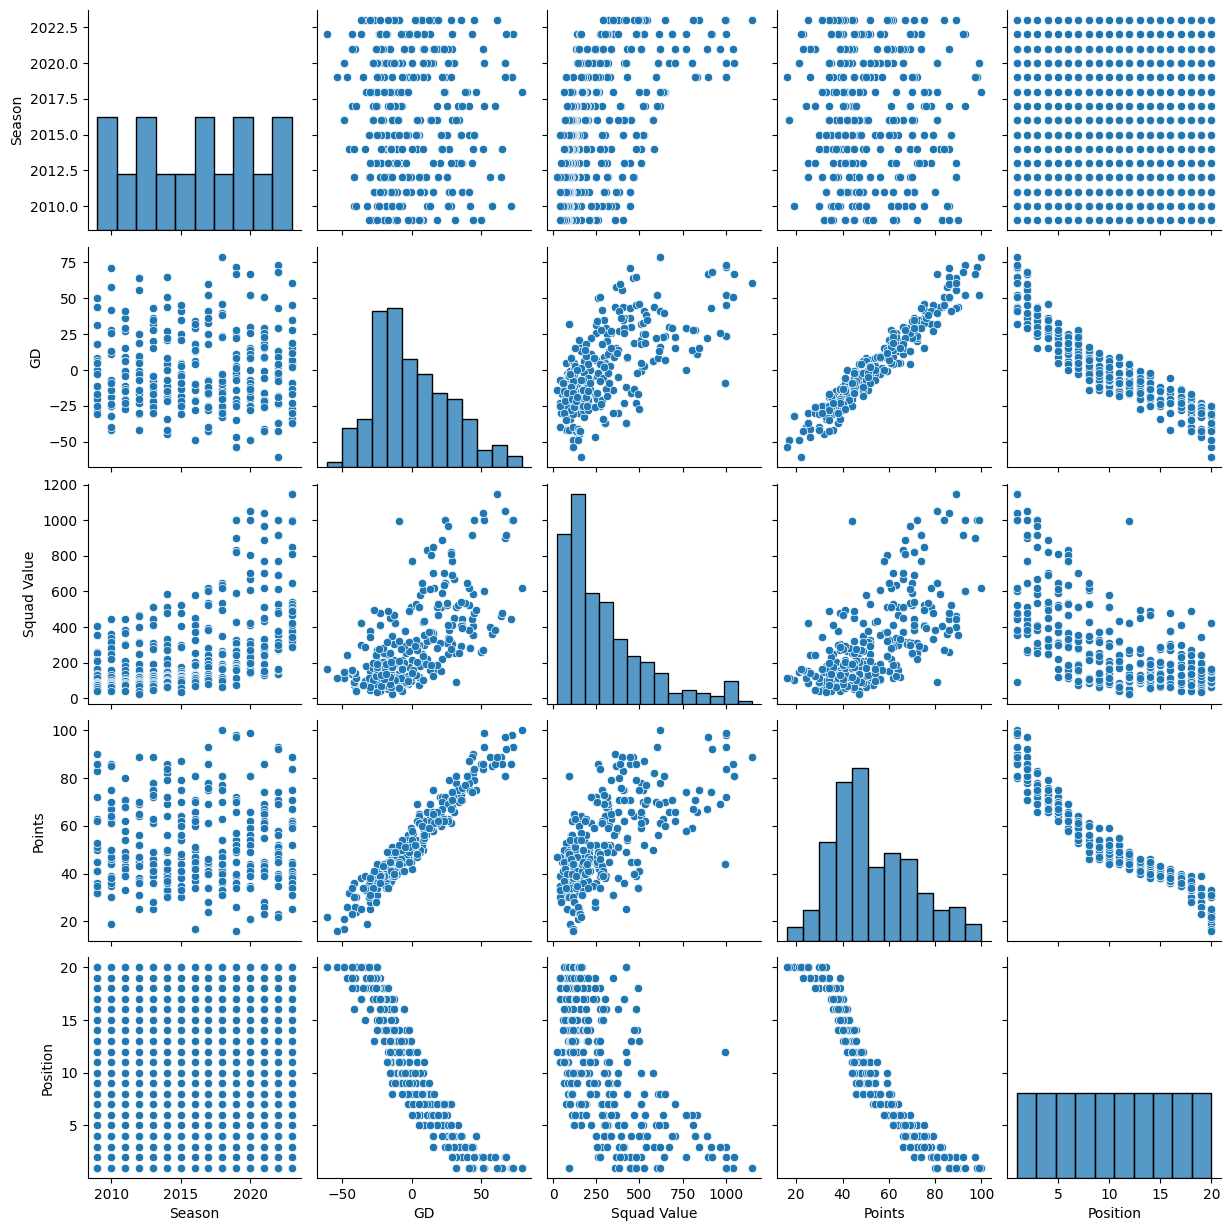

In [4]:
sns.pairplot(data[['Season','GD', 'Squad Value', 'Points', 'Position']])

Pegando dados gerais, comprovamos sentimentos óbvios como quanto maior o saldo de gols, melhor sua pontuação e melhor sua posição no campeonato. Em relação ao valor do elenco, nota-se que quanto maior o valor, maior o número de pontos. Mas a correlação não é tão direta assim, pois os pontos nos gráficos estão espaçados e os valores dos elencos foram aumentando bastante ao longo das temporadas.

Na dúvida, iremos fazer um código booleano perguntando se há uma correlação direta entre o valor do elenco e a posição final no campeonato. Em caso de falso, teremos que aprofundar nossa análise.

In [5]:
abs(data['Squad Value'].corr(data['Position'])) > data['Squad Value'].corr(data['Points'])

False

# Construindo um modelo de teste

In [6]:
#Primeiramente, redimensionar as colunas que julgamos mais relevantes para a análise

X = data['Squad Value']
y = data['Points']

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

Colocando o valor do elenco no eixo x e os pontos conquistados no eixo y, vamos criar um conjunto de treinamento e teste. Utilizaremos 25% do conjunto para teste e 75% para treinamento.

In [7]:
#Usando o train_test_split para criar conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [8]:
#Configurando um modelo de regressão linear para teste

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [9]:
#Imprimindo o coeficiene do teste
print(lm.coef_)

[[0.05236671]]


Ou seja, podemos afirmar no nosso modelo de teste que cada milhão de euro em valor de elenco significa 0.05 pontos na tabela. Ser campeão custa caro.

Agora vamos plotar os dados de teste e colocar uma linha representando as previsões do modelo de regressão linear.

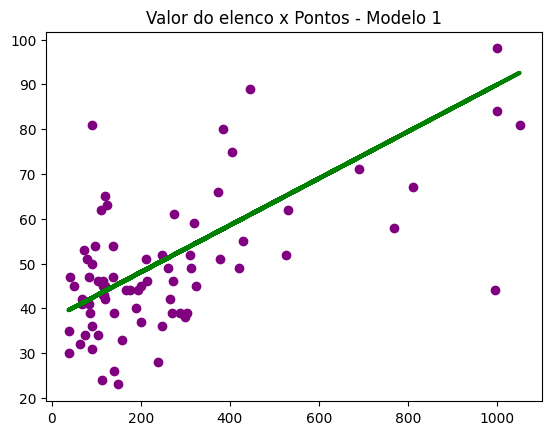

In [10]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("Valor do elenco x Pontos - Modelo 1")

plt.show()

Agora comparamos os dados de previsão (eixo y) com os dados reais (eixo x).

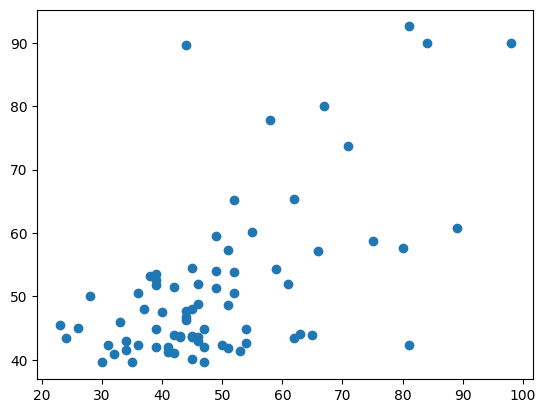

In [11]:
plt.scatter(y_test,predictions)

Dá pra notar bem que os dados de previsão acertam na tendência mas deixam escapar diversos casos. Vamos tentar analisar melhor através de um histograma.

<ipython-input-12-54323d1703d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=65, color = 'purple')


<Axes: title={'center': 'Diferença de pontos entre a previsão e o concreto'}, ylabel='Density'>

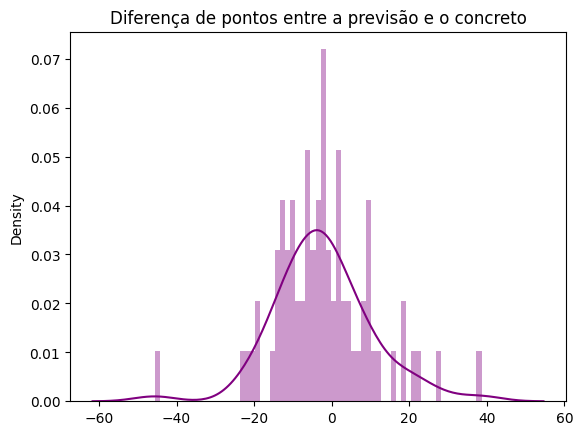

In [12]:
plt.title('Diferença de pontos entre a previsão e o concreto')
sns.distplot((y_test-predictions),bins=65, color = 'purple')

Novamente vemos que a previsão em sua maioria acerta mas também que houve poucos erros mas que beiraram até os 40 pontos de diferença.

Vamos calcular o Erro Absoluto Médio para termos uma noção melhor da eficiência da previsão e também colocar os dados numa tabela para podermos compará-los melhor.

In [13]:
#Erro Absoluto Médio
print('Erro Absoluto Médio:', metrics.mean_absolute_error(y_test, predictions))

Erro Absoluto Médio: 9.561457087993553


In [14]:
df = pd.DataFrame({'Pontos': y_test.flatten(), 'Previsão': predictions.flatten()})
df.head()

,Pontos,Previsão
0,45,43.605468
1,55,60.132401
2,41,42.013520
3,32,40.932147
4,26,44.969621


In [15]:
df['Pontos'].corr(df['Previsão'])

0.6036422746374631

# Aprimorando o modelo

Temos que levar em conta a inflação que o mundo do futebol teve durante todo o período de amostragem. Houve um salto de investimentos com a abertura de mercado cada vez maior ao capital estrangeiro e um aumento significativo dos contratos de TV e patrocínios. Portanto, comparar um time de 100 milhões em 2008 com um time de 100 milhões em 2023 não é uma análise precisa.

Para compensar essa situação, vamos criar uma nova coluna chamada 'Valor Relativo'. Isso tomará cada time em uma temporada e dividirá pelo maior valor naquela liga. Esses valores estarão entre 0 e 1 e darão uma melhor impressão do poder de compra comparativo, e, consequentemente, do desempenho na liga. Isso resultará em um modelo melhor para análises. Em seguida faremos uma nova matriz de gráficos para uma melhor análise já considerando os valores relativos extraídos.

In [16]:
#Criando uma lista
relativeValue = []

#Loop através de cada linha
for index, team in data.iterrows():

    #Extraindo a temporada
    season = team['Season']

    #Criando um novo dataframe só com essa temporada
    teamseason = data[data['Season'] == season]

    #Encontrando o elenco mais caro
    maxvalue = teamseason['Squad Value'].max()

    #Encontra um valor relativo dividindo o valor do time pelo maior valor da temporada
    tempRelativeValue = team['Squad Value']/maxvalue

    #Adiciona o valor relativo a lista
    relativeValue.append(tempRelativeValue)

#Adiciona essa lista a uma nova coluna no dataframe
data["Valor Relativo"] = relativeValue

data.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position,Valor Relativo
0,EPL,2009,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3,1.000000
1,EPL,2009,Manchester United,31,24.3,20,356.10,11.49,44,90,1,0.875584
2,EPL,2009,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2,0.632481
3,EPL,2009,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4,0.616794
4,EPL,2009,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8,0.522744


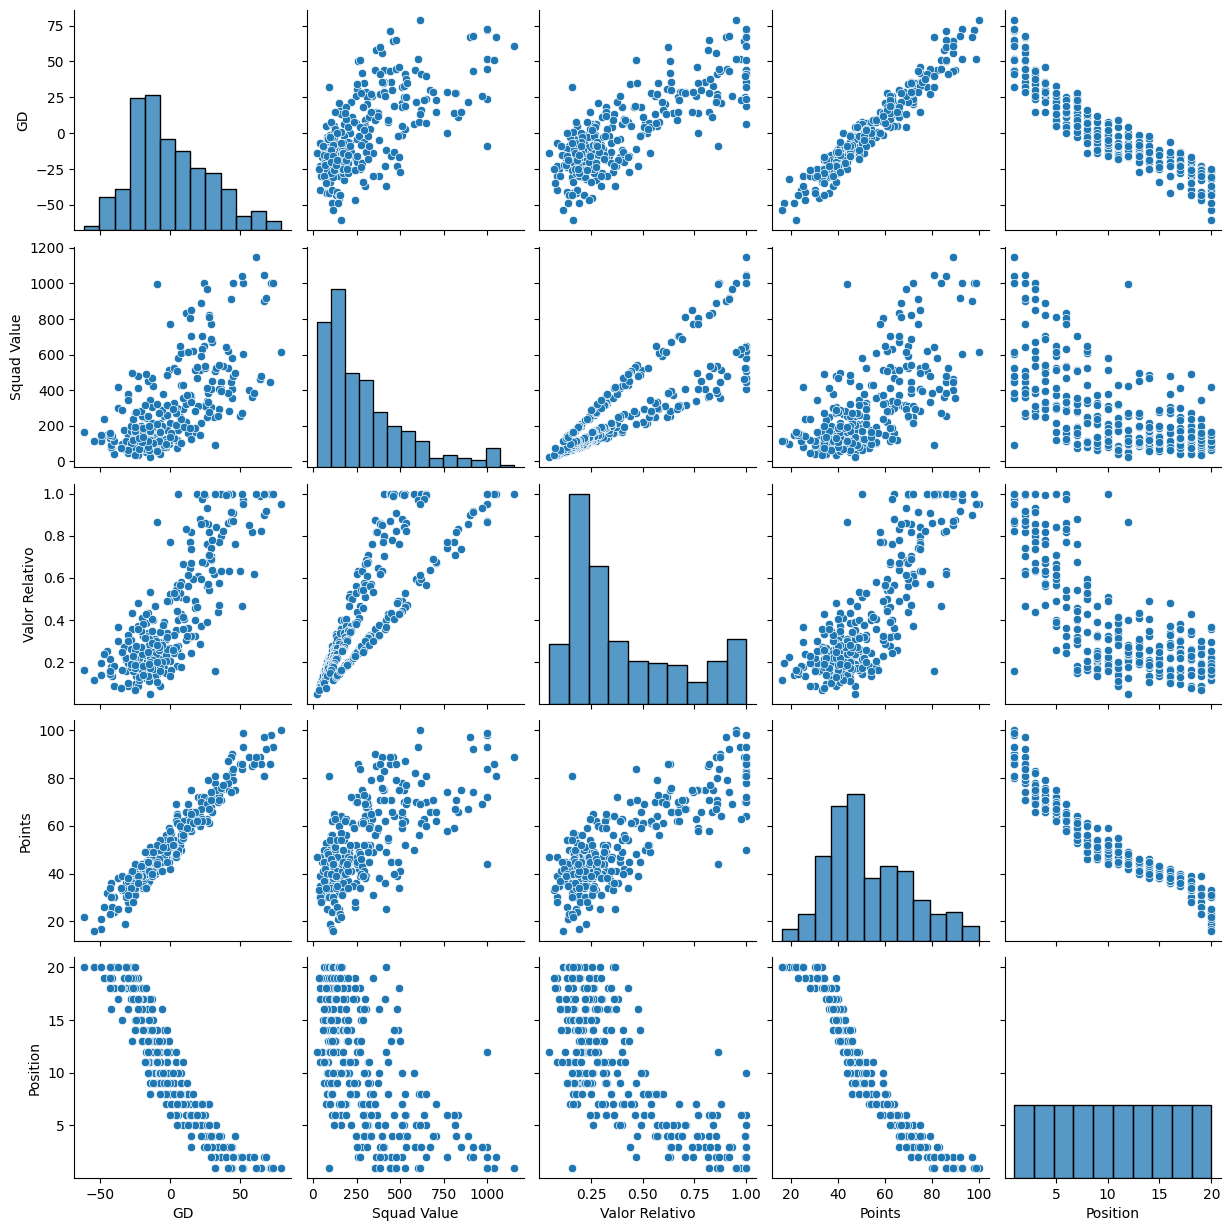

In [17]:
sns.pairplot(data[['GD', 'Squad Value', 'Valor Relativo', 'Points', 'Position']])

A nova matriz de gráficos ficou parecida com a anterior mas com uma precisão maior, levando em conta os valores relativos. As linhas ficaram ainda mais retas e consistentes.

In [18]:
#Vamos novamente redimensionar as colunas que agora usaremos para fazer a análise
X = data['Valor Relativo']
y = data['Points']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

#Criando conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#Configurando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lm.coef_/10)

[[5.30662951]]


Dividimos o resultado do coeficiente por 10 para uma melhor compreensão do resultado. Podemos dizer que a cada 10% abaixo do time mais caro, haveria uma perda de 5.3 pontos em média.

Agora vamos plotar novamente os dados e colocar uma linha representando as previsões do modelo de regressão linear. Depois vamos comparar de novo os dados de previsão (eixo y) com os dados reais (eixo x).

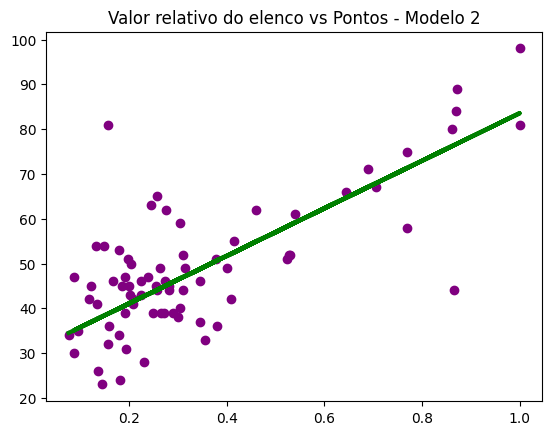

In [20]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("Valor relativo do elenco vs Pontos - Modelo 2")
plt.show()

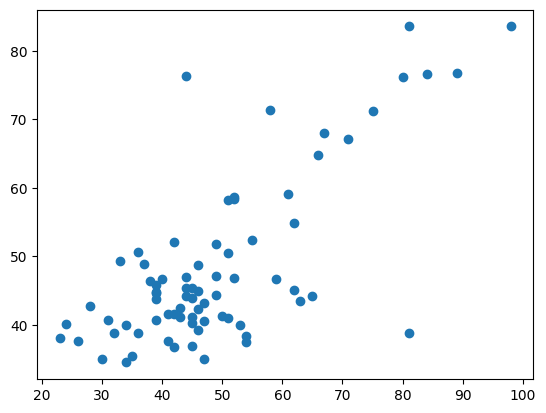

In [21]:
plt.scatter(y_test,predictions)

Dessa vez pudemos ver que os dados estão ligeiramente mais próximos da linha de previsão, e no segundo gráfico os dados parecem numa crescente mais linear e coerente se comparado ao modelo anterior. Vamos ver agora como fica o histograma.

<ipython-input-22-bc978cf745d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=65,color='purple');


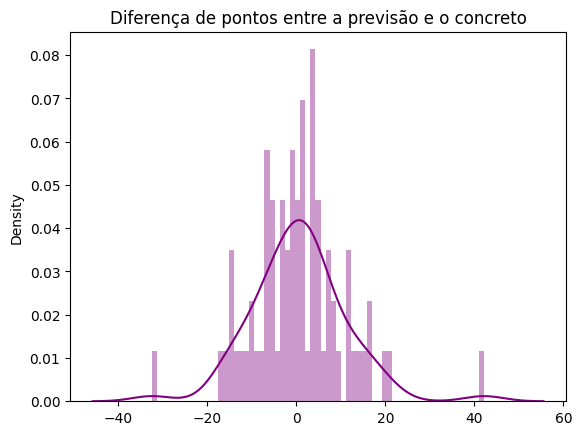

In [22]:
plt.title('Diferença de pontos entre a previsão e o concreto')
sns.distplot((y_test-predictions),bins=65,color='purple');

In [23]:
print('Erro asoluto médio:', metrics.mean_absolute_error(y_test, predictions))

Erro asoluto médio: 7.613818237442274


No modelo anterior, o Erro Absoluto Médio agora é de **7.6** se mostrou melhor do que o modelo anterior (foi de 9.5). Melhoramos, é fato. Temos um conhecimento de futebol para sabermos que o futebol não é uma ciência exata (que times surpreendentes como o Leicester de 2016 ou decepcionantes como o Manchester United recente o digam), mas podemos usar dados para embasar nossas análises e os times tomarem suas decisões de investimentos ou não.

Claro que esse estudo é apenas algo superficial e que diversas outras variáveis devem ser levadas em conta numa análise de investimento esportivo. Mas foi estudo que apresentou dados concretos, dataframes, gráficos, histogramas, construção de modelos, regressão linear, previsão, análise e margem de erro.

E dá pra afirmar que o valor do elenco impacta diretamente a competitividade da equipe, isso não é segredo para ninguém. Mas esse estudo consegue mostrar um pouco do tamanho desse impacto e a influência financeira no resultado do campeonato.